In [27]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
%matplotlib inline

In [28]:
data = pd.read_csv("~/Downloads/emails.csv")

In [29]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliviali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [80]:
data['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

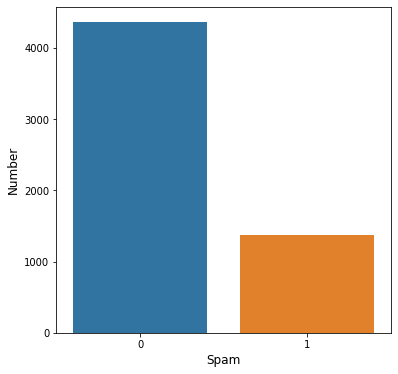

In [81]:
label_number = data.spam.value_counts()
plt.figure(figsize = (6,6))
sns.barplot(label_number.index, label_number.values, alpha = 1)
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Number', fontsize = 12)
plt.show()

Text(0.5, 0, 'Email Type')

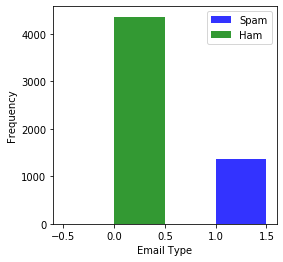

In [90]:
plt.figure(figsize=(4,4))

data.spam[data.spam==1].plot(bins=2, kind='hist', color='blue', 
                                       label='Spam', alpha=0.8)

data.spam[data.spam==0].plot(bins=2, kind='hist', color='green', 
                                       label='Ham', alpha=0.8)
plt.legend()
plt.xlabel("Email Type")

In [68]:
def clean(text):
    removed = ''.join([char for char in text if char not in string.punctuation])
    cleaned = ' '.join([word for word in removed.split() if word.lower() not in stopwords.words('english')])
    return cleaned

In [33]:
data['text']=data['text'].apply(clean)

In [39]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [40]:
def stem(text):
    stemmed = ''.join([ps.stem(word) for word in text])
    return stemmed

In [41]:
data['text']=data['text'].apply(stem)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
matrix = cv.fit_transform(data['text'])

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matrix, data['spam'], test_size = 0.20)

In [92]:
from sklearn.metrics import accuracy_score, recall_score

In [93]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred3 = nb.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

accuracy score is:  0.9895287958115183
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       876
           1       0.97      0.99      0.98       270

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred4 = knn.predict(X_test)
print("accuracy score is :",accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

accuracy score is : 0.9022687609075044
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       881
           1       0.94      0.62      0.75       265

    accuracy                           0.90      1146
   macro avg       0.92      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146



In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred2 = rfc.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

accuracy score is:  0.9834205933682374
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       1.00      0.93      0.96       265

    accuracy                           0.98      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146



In [82]:
from sklearn import svm
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)
y_pred1 = svm_classifier.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

accuracy score is:  0.981675392670157
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.99      0.93      0.96       265

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [87]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt(X_train, y_train)
y_pred5 = dt.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

TypeError: 'DecisionTreeClassifier' object is not callable